# IMPORTS

In [1]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

%load_ext autoreload
import os, sys
import numpy as np
import CL_inference as cl_inference

from bacco.baryons import emu_pars

%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')

font, rcnew = cl_inference.plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

2024-06-25 15:57:04,136 - INFO - Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


# SETUP TO GENERATE DATASETS

##### Define in "path_save_root" the path where the datasets will be stored. Also define boxsize and kmax

In [2]:
box = 2000
factor_kmin_cut = 4
kmax = 0.6
path_save_root = os.path.join("/cosmos_storage/home/dlopez/Projects/CL_inference/DATASETS", "DATASET_kmax_"+str(kmax))

In [3]:
box = 5000
factor_kmin_cut = 5
kmax = 0.6
path_save_root = os.path.join("/cosmos_storage/home/dlopez/Projects/CL_inference/DATASETS_box_5000", "DATASET_kmax_"+str(kmax))

##### Define dictionaries with cosmological prior ranges for training, validation and test sets. Also number of cosmologies to sample.

Cosmological prior range for training

In [4]:
dict_bounds_cosmo_train = dict(
    omega_cold    = [0.24, 0.39],
    omega_baryon  = [0.041, 0.059],
    hubble        = [0.61, 0.79],
    ns            = [0.93, 1.0],
    sigma8_cold   = [0.74, 0.89],
    expfactor     = 1.,
    neutrino_mass = 0.,
    w0            = -1.,
    wa            = 0.
)
NN_samples_cosmo_train = 8192
seed_train = 0

Cosmological prior range for validation

In [5]:
dict_bounds_cosmo_val = dict(
    omega_cold    = [0.24, 0.39],
    omega_baryon  = [0.041, 0.059],
    hubble        = [0.61, 0.79],
    ns            = [0.93, 1.0],
    sigma8_cold   = [0.74, 0.89],
    expfactor     = 1.,
    neutrino_mass = 0.,
    w0            = -1.,
    wa            = 0.
)
NN_samples_cosmo_val = 2048
seed_val = 1

Cosmological prior range for test

In [6]:
dict_bounds_cosmo_test = dict(
    omega_cold    = [0.24, 0.39],
    omega_baryon  = [0.041, 0.059],
    hubble        = [0.61, 0.79],
    ns            = [0.93, 1.0],
    sigma8_cold   = [0.74, 0.89],
    expfactor     = 1.,
    neutrino_mass = 0.,
    w0            = -1.,
    wa            = 0.
)
NN_samples_cosmo_test = 2048
seed_test = 2

##### Define dictionaries with baryonic parameters

model_bahamas

In [7]:
hydro_key = "bahamas"
dict_bounds_augs_bahamas = dict(
    M_c       = emu_pars(model=hydro_key)['z_0.0']['M_c'],
    eta       = emu_pars(model=hydro_key)['z_0.0']['eta'],
    beta      = emu_pars(model=hydro_key)['z_0.0']['beta'],
    M1_z0_cen = emu_pars(model=hydro_key)['z_0.0']['M1_z0_cen'],
    theta_out = emu_pars(model=hydro_key)['z_0.0']['theta_out'],
    theta_inn = emu_pars(model=hydro_key)['z_0.0']['theta_inn'],
    M_inn     = emu_pars(model=hydro_key)['z_0.0']['M_inn']
)

model_eagle

In [8]:
hydro_key = "eagle"
dict_bounds_augs_eagle = dict(
    M_c       = emu_pars(model=hydro_key)['z_0.0']['M_c'],
    eta       = emu_pars(model=hydro_key)['z_0.0']['eta'],
    beta      = emu_pars(model=hydro_key)['z_0.0']['beta'],
    M1_z0_cen = emu_pars(model=hydro_key)['z_0.0']['M1_z0_cen'],
    theta_out = emu_pars(model=hydro_key)['z_0.0']['theta_out'],
    theta_inn = emu_pars(model=hydro_key)['z_0.0']['theta_inn'],
    M_inn     = emu_pars(model=hydro_key)['z_0.0']['M_inn']
)

model_illustris

In [9]:
hydro_key = "illustris"
dict_bounds_augs_illustris = dict(
    M_c       = emu_pars(model=hydro_key)['z_0.0']['M_c'],
    eta       = emu_pars(model=hydro_key)['z_0.0']['eta'],
    beta      = emu_pars(model=hydro_key)['z_0.0']['beta'],
    M1_z0_cen = emu_pars(model=hydro_key)['z_0.0']['M1_z0_cen'],
    theta_out = emu_pars(model=hydro_key)['z_0.0']['theta_out'],
    theta_inn = emu_pars(model=hydro_key)['z_0.0']['theta_inn'],
    M_inn     = emu_pars(model=hydro_key)['z_0.0']['M_inn']
)

model_vary1

In [10]:
dict_bounds_augs_vary1 = dict(
    M_c       = [9.0, 15.0],
    eta       = [-0.69, 0.69],
    beta      = 0.,
    M1_z0_cen = 12.,
    theta_out = 0.,
    theta_inn = -1.,
    M_inn     = 13.
)

model_vary2

In [11]:
dict_bounds_augs_vary2 = dict(
    M_c       = 13.5,
    eta       = 0.,
    beta      = [-1.00, 0.69],
    M1_z0_cen = [9.0, 13.0],
    theta_out = 0.,
    theta_inn = -1.,
    M_inn     = 13.
)

model_vary3

In [12]:
dict_bounds_augs_vary3 = dict(
    M_c       = 13.5,
    eta       = 0.,
    beta      = 0.,
    M1_z0_cen = 12.,
    theta_out = [0., 0.47],
    theta_inn = [-2.0, -0.523],
    M_inn     = [9.0, 13.5]
)

model_fixed

In [13]:
NN_fixed_latin = 10
dict_bounds_augs_fixed = dict(
    M_c       = [9.0, 15.0],
    eta       = [-0.69, 0.69],
    beta      = [-1.00, 0.69],
    M1_z0_cen = [9.0, 13.0],
    theta_out = [0., 0.47],
    theta_inn = [-2.0, -0.523],
    M_inn     = [9.0, 13.5]
)
sample_fixed_baryon_models = cl_inference.preprocessing_tools.sample_latin_hypercube(
    dict_bounds_augs_fixed, N_points=NN_fixed_latin, seed=0
)

2024-06-25 15:57:11,371 - INFO - Generating Latin Hypercube samples...


##### Save the generated quantities to validate the datasets

In [14]:
COSMOS = {}
XX = {}
AUG_PARAMS = {}
EXTENDED_AUG_PARAMS = {}

# Generate training set

In [15]:
ds_mode = 'TRAIN'
COSMOS[ds_mode] = {}
XX[ds_mode] = {}
AUG_PARAMS[ds_mode] = {}
EXTENDED_AUG_PARAMS[ds_mode] = {}

path_save = os.path.join(path_save_root, ds_mode)

In [16]:
model_name = "Model_fixed_nl"
mode_baccoemu = "nonlinear"
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    mode_baccoemu     = mode_baccoemu,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:57:11,403 - INFO - Generating baccoemu dataset...
2024-06-25 15:57:11,404 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:57:11,412 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:57:11,436 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:57:12.495090: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 15:57:12.786385: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 15:57:12.786519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 15:57:12.825251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to r

Loading sigma8 emulator...


2024-06-25 15:57:21,842 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:21,843 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
2024-06-25 15:57:22,042 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:22,043 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:57:22,644 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:22,646 - INFO - path_and_singleprint metric could not be logged. Saved model 

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:57:23,043 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:23,044 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [17]:
model_name = "Model_vary_all"
NN_samples_augs = 20
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:57:25,350 - INFO - Generating baccoemu dataset...
2024-06-25 15:57:25,354 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:57:25,360 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:57:25,602 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:57:25,769 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:25,770 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:57:25,944 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:25,945 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:57:26,531 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:26,532 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:57:27,075 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:57:27,076 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


In [18]:
hydro_key = 'bahamas'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    dict_bounds_augs  = dict_bounds_augs_bahamas,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:58:08,877 - INFO - Generating baccoemu dataset...
2024-06-25 15:58:08,879 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:08,882 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:58:09,074 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:09,075 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 15:58:09,247 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:09,248 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:58:09,405 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:09,407 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:58:09,774 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:09,776 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [19]:
hydro_key = 'eagle'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    dict_bounds_augs  = dict_bounds_augs_eagle,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:58:11,293 - INFO - Generating baccoemu dataset...
2024-06-25 15:58:11,295 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:11,298 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:58:11,460 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:11,461 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:58:11,614 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:11,615 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:58:12,148 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:12,149 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [20]:
hydro_key = 'illustris'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    dict_bounds_augs  = dict_bounds_augs_illustris,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:58:13,607 - INFO - Generating baccoemu dataset...
2024-06-25 15:58:13,609 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:13,612 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:58:13,772 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:13,773 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:58:13,942 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:13,943 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 15:58:14,790 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:14,791 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:58:14,966 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:14,968 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:58:15,162 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:15,163 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


In [21]:
model_name = "Model_vary_1"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    dict_bounds_augs  = dict_bounds_augs_vary1,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:58:16,474 - INFO - Generating baccoemu dataset...
2024-06-25 15:58:16,476 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:16,480 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:16,575 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:58:16,738 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:16,739 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:58:16,914 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:16,915 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:58:17,438 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:17,440 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [22]:
model_name = "Model_vary_2"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    dict_bounds_augs  = dict_bounds_augs_vary2,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:58:39,131 - INFO - Generating baccoemu dataset...
2024-06-25 15:58:39,134 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:39,140 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:58:39,244 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:58:39,435 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:39,436 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 15:58:39,607 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:39,608 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:58:39,780 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:39,782 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:58:40,190 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:40,191 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:58:40,355 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:58:40,356 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


In [23]:
model_name = "Model_vary_3"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_train,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_train,
    dict_bounds_augs  = dict_bounds_augs_vary3,
    seed              = seed_train,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:59:01,171 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:01,174 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:01,180 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:01,283 - INFO - Generating power spectrum using baccoemu emulator...


Loading sigma8 emulator...


2024-06-25 15:59:02,145 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:02,146 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
2024-06-25 15:59:02,313 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:02,314 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:02,490 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:02,491 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:02,854 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:02,855 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [24]:
for ii in range(sample_fixed_baryon_models.shape[0]):
    model_name = "Model_fixed_" + str(ii)
    NN_samples_augs = 1
    dict_bounds_augs_fixed = dict(
        M_c       = sample_fixed_baryon_models[ii,0],
        eta       = sample_fixed_baryon_models[ii,1],
        beta      = sample_fixed_baryon_models[ii,2],
        M1_z0_cen = sample_fixed_baryon_models[ii,3],
        theta_out = sample_fixed_baryon_models[ii,4],
        theta_inn = sample_fixed_baryon_models[ii,5],
        M_inn     = sample_fixed_baryon_models[ii,6],
    )
    COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
        NN_samples_cosmo  = NN_samples_cosmo_train,
        NN_samples_augs   = NN_samples_augs,
        dict_bounds_cosmo = dict_bounds_cosmo_train,
        dict_bounds_augs  = dict_bounds_augs_fixed,
        seed              = seed_train,
        path_save         = path_save,
        model_name        = model_name,
        kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
    )

2024-06-25 15:59:22,229 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:22,232 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:22,236 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:22,421 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:22,422 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 15:59:22,597 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:22,598 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:22,754 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:22,755 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:23,137 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:23,138 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 15:59:24,719 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:24,722 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:24,725 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:24,904 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:24,905 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 15:59:25,073 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:25,075 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:25,251 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:25,252 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 15:59:26,058 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:26,059 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:26,256 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:26,257 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:59:26,428 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:26,429 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 15:59:27,761 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:27,762 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:27,765 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:27,930 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:27,931 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:28,103 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:28,104 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:28,730 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:28,731 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:28,919 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:28,921 - INFO - path_and_singleprint metric could not be logged. Saved 

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 15:59:30,356 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:30,359 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:30,363 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:30,544 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:30,545 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 15:59:30,712 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:30,713 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:30,896 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:30,898 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:31,295 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:31,297 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:59:31,487 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:31,488 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 15:59:32,871 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:32,874 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:32,877 - INFO - Generating power spectrum using baccoemu emulator...


Loading sigma8 emulator...


2024-06-25 15:59:33,638 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:33,639 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
2024-06-25 15:59:33,801 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:33,802 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:33,989 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:33,990 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:34,396 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:34,397 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:59:34,580 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:34,582 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 15:59:35,982 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:35,984 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:35,988 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:36,159 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:36,161 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 15:59:36,347 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:36,348 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:36,509 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:36,510 - INFO - path_and_singleprint metric could not be logged. Saved model 

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:36,883 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:36,884 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 15:59:38,462 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:38,464 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:38,467 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:38,637 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:38,638 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:38,802 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:38,803 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 15:59:39,626 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:39,628 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 15:59:39,807 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:39,808 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 15:59:39,988 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:39,990 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 15:59:41,344 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:41,346 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:41,349 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:41,517 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:41,518 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:41,674 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:41,676 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:42,209 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:42,210 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 15:59:43,685 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:43,687 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:43,690 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:43,857 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:43,859 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:44,011 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:44,013 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:44,545 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:44,547 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 15:59:46,043 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:46,045 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:46,048 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:46,217 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:46,218 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:47,103 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:47,104 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:47,666 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:47,667 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


# Generate validation set

In [25]:
ds_mode = 'VAL'
COSMOS[ds_mode] = {}
XX[ds_mode] = {}
AUG_PARAMS[ds_mode] = {}
EXTENDED_AUG_PARAMS[ds_mode] = {}

path_save = os.path.join(path_save_root, ds_mode)

In [26]:
model_name = "Model_fixed_nl"
mode_baccoemu = "nonlinear"
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    mode_baccoemu     = mode_baccoemu,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:59:49,160 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:49,161 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:49,163 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:49,168 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:49,342 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:49,343 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:49,543 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:49,545 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:50,048 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:50,050 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [27]:
model_name = "Model_vary_all"
NN_samples_augs = 20
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 15:59:50,544 - INFO - Generating baccoemu dataset...
2024-06-25 15:59:50,547 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:50,551 - INFO - Generating Latin Hypercube samples...
2024-06-25 15:59:50,617 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 15:59:50,791 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:50,792 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 15:59:50,944 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:50,945 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 15:59:52,124 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 15:59:52,125 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [28]:
hydro_key = 'bahamas'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    dict_bounds_augs  = dict_bounds_augs_bahamas,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:02,257 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:02,259 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:02,262 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:02,431 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:02,432 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:02,587 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:02,588 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:03,123 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:03,125 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [29]:
hydro_key = 'eagle'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    dict_bounds_augs  = dict_bounds_augs_eagle,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:03,616 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:03,618 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:03,621 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:03,796 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:03,797 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:00:03,970 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:03,971 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:04,137 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:04,138 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:04,532 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:04,533 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [30]:
hydro_key = 'illustris'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    dict_bounds_augs  = dict_bounds_augs_illustris,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:05,030 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:05,031 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:05,034 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:05,214 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:05,215 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:05,894 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:05,896 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:00:06,424 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:06,425 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:00:06,587 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:06,588 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


In [31]:
model_name = "Model_vary_1"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    dict_bounds_augs  = dict_bounds_augs_vary1,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:06,924 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:06,926 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:06,929 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:06,953 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:07,123 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:07,124 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:07,276 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:07,277 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:07,795 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:07,796 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [32]:
model_name = "Model_vary_2"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    dict_bounds_augs  = dict_bounds_augs_vary2,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:12,462 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:12,465 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:12,468 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:12,493 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:12,675 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:12,676 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:00:12,850 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:12,851 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:13,003 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:13,004 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:14,010 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:14,011 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [33]:
model_name = "Model_vary_3"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_val,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_val,
    dict_bounds_augs  = dict_bounds_augs_vary3,
    seed              = seed_val,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:18,472 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:18,474 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:18,476 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:18,502 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:18,686 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:18,687 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:00:18,843 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:18,844 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:18,996 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:18,997 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:19,365 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:19,366 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [34]:
for ii in range(sample_fixed_baryon_models.shape[0]):
    model_name = "Model_fixed_" + str(ii)
    NN_samples_augs = 1
    dict_bounds_augs_fixed = dict(
        M_c       = sample_fixed_baryon_models[ii,0],
        eta       = sample_fixed_baryon_models[ii,1],
        beta      = sample_fixed_baryon_models[ii,2],
        M1_z0_cen = sample_fixed_baryon_models[ii,3],
        theta_out = sample_fixed_baryon_models[ii,4],
        theta_inn = sample_fixed_baryon_models[ii,5],
        M_inn     = sample_fixed_baryon_models[ii,6],
    )
    COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
        NN_samples_cosmo  = NN_samples_cosmo_val,
        NN_samples_augs   = NN_samples_augs,
        dict_bounds_cosmo = dict_bounds_cosmo_val,
        dict_bounds_augs  = dict_bounds_augs_fixed,
        seed              = seed_val,
        path_save         = path_save,
        model_name        = model_name,
        kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
    )

2024-06-25 16:00:24,078 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:24,080 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:24,082 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:24,245 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:24,246 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:24,397 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:24,399 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:00:24,960 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:24,961 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:00:25,133 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:25,134 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:00:25,438 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:25,439 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:25,442 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:25,601 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:25,603 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:26,287 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:26,289 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:00:26,842 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:26,843 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:00:27,006 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:27,007 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:00:27,313 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:27,315 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:27,317 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:27,467 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:27,469 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:27,623 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:27,624 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:28,144 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:28,145 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:00:28,618 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:28,619 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:28,622 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:28,776 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:28,777 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:28,957 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:28,958 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:30,102 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:30,103 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:00:30,596 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:30,597 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:30,600 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:30,762 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:30,764 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:30,925 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:30,926 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:00:31,475 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:31,476 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:00:31,644 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:31,646 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:00:31,952 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:31,954 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:31,956 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:32,106 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:32,107 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:32,258 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:32,260 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:32,775 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:32,776 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:00:33,268 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:33,270 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:33,272 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:33,422 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:33,424 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:33,579 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:33,581 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:34,625 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:34,626 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:00:35,121 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:35,122 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:35,125 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:35,285 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:35,286 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:35,446 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:35,447 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:35,993 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:35,994 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:00:36,492 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:36,494 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:36,497 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:36,667 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:36,668 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:36,833 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:36,834 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:38,061 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:38,062 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:00:38,565 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:38,567 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:38,569 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:38,737 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:38,739 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:00:38,912 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:38,914 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:00:39,075 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:39,076 - INFO - path_and_singleprint metric could not be logged. Saved model 

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:39,435 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:39,437 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


# Generate test set

In [35]:
ds_mode = 'TEST'
COSMOS[ds_mode] = {}
XX[ds_mode] = {}
AUG_PARAMS[ds_mode] = {}
EXTENDED_AUG_PARAMS[ds_mode] = {}

path_save = os.path.join(path_save_root, ds_mode)

In [36]:
model_name = "Model_fixed_nl"
mode_baccoemu = "nonlinear"
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    mode_baccoemu     = mode_baccoemu,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:39,982 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:39,983 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:39,986 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:39,994 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:40,164 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:40,165 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:40,320 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:40,321 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:40,826 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:40,827 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [37]:
model_name = "Model_vary_all"
NN_samples_augs = 20
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:41,255 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:41,257 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:41,260 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:41,312 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:41,470 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:41,472 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:41,618 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:41,619 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 16:00:42,504 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:42,506 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:00:42,676 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:42,677 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:00:42,857 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:42,859 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


In [38]:
hydro_key = 'bahamas'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    dict_bounds_augs  = dict_bounds_augs_bahamas,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:52,838 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:52,840 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:52,842 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:53,023 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:53,024 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:00:53,183 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:53,184 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:53,358 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:53,360 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:53,713 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:53,715 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [39]:
hydro_key = 'eagle'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    dict_bounds_augs  = dict_bounds_augs_eagle,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:54,178 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:54,181 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:54,183 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:54,342 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:54,343 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:54,493 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:54,495 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:55,012 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:55,013 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [40]:
hydro_key = 'illustris'
model_name = "Model_fixed_"+hydro_key
NN_samples_augs = 1
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    dict_bounds_augs  = dict_bounds_augs_illustris,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:55,487 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:55,489 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:55,491 - INFO - Generating power spectrum using baccoemu emulator...


Loading sigma8 emulator...


2024-06-25 16:00:56,297 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:56,299 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
2024-06-25 16:00:56,453 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:56,454 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:56,610 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:56,611 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:56,983 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:56,984 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [41]:
model_name = "Model_vary_1"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    dict_bounds_augs  = dict_bounds_augs_vary1,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:00:57,438 - INFO - Generating baccoemu dataset...
2024-06-25 16:00:57,440 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:57,442 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:00:57,467 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:00:57,621 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:57,623 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:00:57,772 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:57,773 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:00:58,282 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:00:58,284 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [42]:
model_name = "Model_vary_2"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    dict_bounds_augs  = dict_bounds_augs_vary2,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:01:03,059 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:03,061 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:03,064 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:03,089 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:03,274 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:03,275 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:01:03,435 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:03,436 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:03,597 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:03,598 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 16:01:04,302 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:04,304 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:04,487 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:04,488 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:04,654 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:04,656 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


In [43]:
model_name = "Model_vary_3"
NN_samples_augs = 10
COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
    NN_samples_cosmo  = NN_samples_cosmo_test,
    NN_samples_augs   = NN_samples_augs,
    dict_bounds_cosmo = dict_bounds_cosmo_test,
    dict_bounds_augs  = dict_bounds_augs_vary3,
    seed              = seed_test,
    path_save         = path_save,
    model_name        = model_name,
    kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
)

2024-06-25 16:01:09,035 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:09,037 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:09,040 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:09,066 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:09,248 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:09,249 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...


2024-06-25 16:01:09,422 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:09,424 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:09,593 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:09,594 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:01:09,980 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:09,981 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [44]:
for ii in range(sample_fixed_baryon_models.shape[0]):
    model_name = "Model_fixed_" + str(ii)
    NN_samples_augs = 1
    dict_bounds_augs_fixed = dict(
        M_c       = sample_fixed_baryon_models[ii,0],
        eta       = sample_fixed_baryon_models[ii,1],
        beta      = sample_fixed_baryon_models[ii,2],
        M1_z0_cen = sample_fixed_baryon_models[ii,3],
        theta_out = sample_fixed_baryon_models[ii,4],
        theta_inn = sample_fixed_baryon_models[ii,5],
        M_inn     = sample_fixed_baryon_models[ii,6],
    )
    COSMOS[ds_mode][model_name], XX[ds_mode][model_name], AUG_PARAMS[ds_mode][model_name], EXTENDED_AUG_PARAMS[ds_mode][model_name] = cl_inference.preprocessing_tools.generate_baccoemu_dataset(
        NN_samples_cosmo  = NN_samples_cosmo_test,
        NN_samples_augs   = NN_samples_augs,
        dict_bounds_cosmo = dict_bounds_cosmo_test,
        dict_bounds_augs  = dict_bounds_augs_fixed,
        seed              = seed_test,
        path_save         = path_save,
        model_name        = model_name,
        kmax              = kmax, box=box, factor_kmin_cut=factor_kmin_cut
    )

2024-06-25 16:01:14,570 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:14,572 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:14,574 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:14,732 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:14,733 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:14,902 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:14,903 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:01:15,413 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:15,415 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:01:15,904 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:15,906 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:15,908 - INFO - Generating power spectrum using baccoemu emulator...


Loading sigma8 emulator...


2024-06-25 16:01:16,695 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:16,696 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
2024-06-25 16:01:16,857 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:16,858 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using

Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:17,023 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:17,025 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:17,425 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:17,426 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:17,589 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:17,591 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:01:17,906 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:17,908 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:17,911 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:18,068 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:18,070 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:18,238 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:18,239 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:18,769 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:18,770 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:18,931 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:18,932 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:01:19,239 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:19,240 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:19,242 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:19,400 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:19,401 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:19,556 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:19,557 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 16:01:20,418 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:20,420 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:20,601 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:20,602 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:20,769 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:20,770 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:01:21,079 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:21,080 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:21,082 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:21,237 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:21,238 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:21,394 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:21,396 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:01:21,915 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:21,917 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:01:22,422 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:22,423 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:22,425 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:22,577 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:22,578 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:22,733 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:22,734 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:01:23,255 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:23,256 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


2024-06-25 16:01:23,712 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:23,713 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:23,718 - INFO - Generating power spectrum using baccoemu emulator...


Loading sigma8 emulator...


2024-06-25 16:01:24,547 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:24,548 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
2024-06-25 16:01:24,735 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:24,736 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:24,916 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:24,917 - INFO - path_and_singleprint metric could not be logged. Saved model 

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:25,323 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:25,325 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:25,517 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:25,519 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:01:25,877 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:25,878 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:25,879 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:26,043 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:26,044 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:26,207 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:26,208 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:26,775 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:26,776 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-mainta

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:26,953 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:26,955 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:01:27,273 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:27,274 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:27,277 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:27,443 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:27,444 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:27,610 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:27,611 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...


2024-06-25 16:01:28,673 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:28,674 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
2024-06-25 16:01:28,867 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:28,868 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


2024-06-25 16:01:29,048 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:29,049 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Baryonic Emulator loaded in memory.


2024-06-25 16:01:29,376 - INFO - Generating baccoemu dataset...
2024-06-25 16:01:29,377 - INFO - Generating Latin Hypercube samples...
2024-06-25 16:01:29,381 - INFO - Generating power spectrum using baccoemu emulator...
2024-06-25 16:01:29,538 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:29,539 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


2024-06-25 16:01:29,696 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:29,697 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limita

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


2024-06-25 16:01:30,205 - INFO - Fingerprint not found. Saved model loading will continue.
2024-06-25 16:01:30,207 - INFO - path_and_singleprint metric could not be logged. Saved model loading will continue.
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.


# VALIDATE DATASETS

In [45]:
kf = 2.0 * np.pi / box
kmin=np.log10(factor_kmin_cut*kf)
N_kk = int((kmax - kmin) / (8*kf))
kk = np.logspace(kmin, kmax, num=N_kk)

In [46]:
ds_mode = 'TEST'
model_name = 'Model_fixed_illustris'

cosmos = COSMOS[ds_mode][model_name]
xx = XX[ds_mode][model_name]
aug_params = AUG_PARAMS[ds_mode][model_name]
extended_aug_params = EXTENDED_AUG_PARAMS[ds_mode][model_name]

print(cosmos.shape)
print(np.min(cosmos, axis=0))
print(np.max(cosmos, axis=0))

print(xx.shape)
print(xx.min())
print(xx.max())

print(aug_params.shape)
tmp_aug_params = np.reshape(aug_params, (aug_params.shape[0]*aug_params.shape[1], aug_params.shape[-1]))
print(tmp_aug_params.shape)
print(np.min(tmp_aug_params, axis=0))
print(np.max(tmp_aug_params, axis=0))

print(extended_aug_params.shape)

(2048, 5)
[0.24000642 0.04100643 0.61004414 0.93000435 0.74001409]
[0.38995125 0.05899252 0.78999431 0.99998963 0.88994846]
(2048, 1, 278)
1.4082677598509339
4.774213425572659
(2048, 1, 0)
(2048, 0)
[]
[]
(2048, 1, 7)


<IPython.core.display.Javascript object>


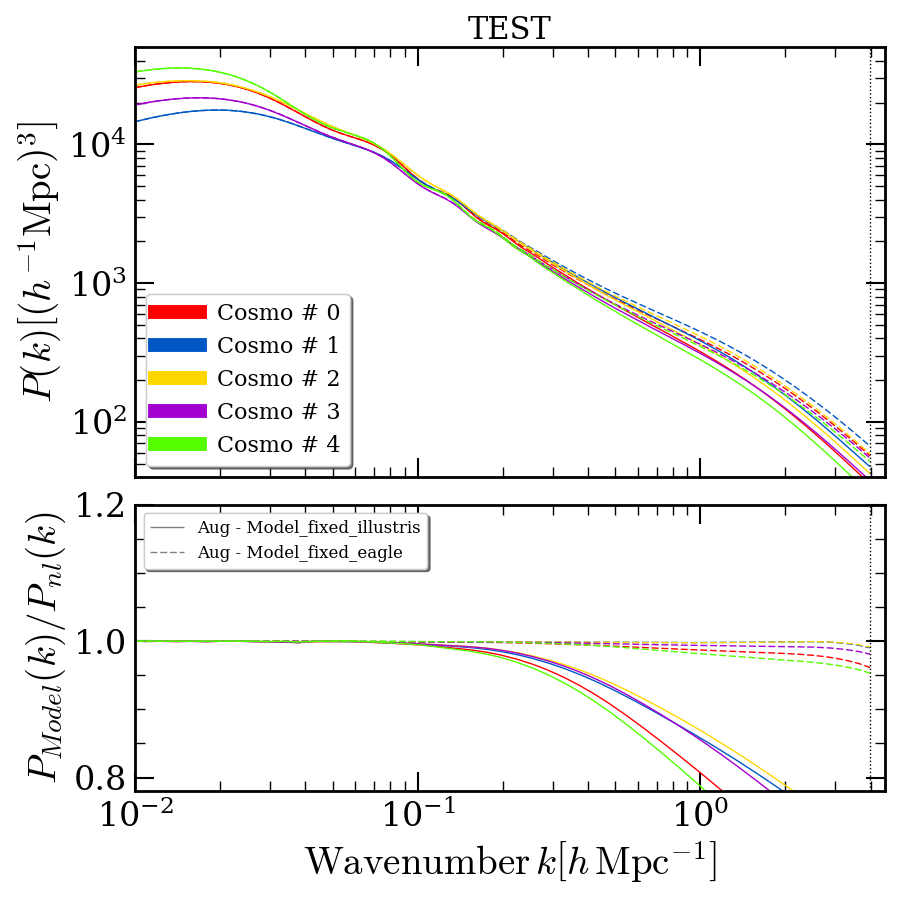

In [47]:
ds_mode = 'TEST'
# list_plot_models = [ "Model_fixed_nl"]
# list_plot_models = [ "Model_fixed_1", "Model_fixed_2"]
# list_plot_models = [ "Model_vary_1", "Model_vary_2"]
list_plot_models = [ "Model_fixed_illustris", "Model_fixed_eagle"]
# list_plot_models = [ "Model_vary_all"]

fig, axs = mpl.pyplot.subplots(2,1,figsize=(9,9), gridspec_kw={'height_ratios': [1.5, 1]})
axs[0].set_ylabel(r'$P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right]$')
axs[1].set_ylabel(r'$P_{Model}(k) / P_{nl}(k)$')
axs[1].set_xlabel(r'$\mathrm{Wavenumber}\, k \left[ h\, \mathrm{Mpc}^{-1} \right]$')
axs[0].set_title(ds_mode, fontsize=22)

N_plot_cosmo = 5
indexes_cosmo = np.random.choice(XX[ds_mode][model_name].shape[0], N_plot_cosmo, replace=False)
# print("indexes_cosmo", indexes_cosmo)

colors = cl_inference.plot_utils.get_N_colors(N_plot_cosmo, mpl.colormaps['prism'])
linestyles = cl_inference.plot_utils.get_N_linestyles(len(list_plot_models))
custom_lines_cosmo = []
custom_names_cosmo = []
custom_lines_augs = []
custom_names_augs = []
for ii_cosmo, index_cosmo in enumerate(indexes_cosmo):
    custom_lines_cosmo.append(mpl.lines.Line2D([0], [0], color=colors[ii_cosmo], ls='-', lw=10, marker=None, markersize=8))
    custom_names_cosmo.append('Cosmo # '+str(ii_cosmo))
    for ii_model, model_name in enumerate(list_plot_models):
        axs[0].plot(
            np.array(kk), 10**XX[ds_mode][model_name][ii_cosmo,:].T,
            c=colors[ii_cosmo], linestyle=linestyles[ii_model], lw=1, marker=None, ms=2
        )
        axs[1].plot(
            np.array(kk),
            10**(XX[ds_mode][model_name][ii_cosmo,:].T)/10**(XX[ds_mode]['Model_fixed_nl'][ii_cosmo,:].T),
            c=colors[ii_cosmo], linestyle=linestyles[ii_model], lw=1, marker=None, ms=2
         )
        if ii_cosmo == 0:
            custom_lines_augs.append(mpl.lines.Line2D([0], [0], color='grey', ls=linestyles[ii_model], lw=1, marker=None, markersize=8))
            custom_names_augs.append('Aug - '+model_name)

axs[0].axvline(10**kmax, c='k', ls=':', lw=1)
axs[1].axvline(10**kmax, c='k', ls=':', lw=1)
            
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[0].set_yscale('log')
legend = axs[0].legend(custom_lines_cosmo, custom_names_cosmo, loc='lower left', fancybox=True, shadow=True, ncol=1,fontsize=16)
axs[0].add_artist(legend)
legend = axs[1].legend(custom_lines_augs, custom_names_augs, loc='upper left', fancybox=True, shadow=True, ncol=1,fontsize=12)
axs[1].add_artist(legend)
axs[0].set_xlim([0.01, 4.5])
axs[1].set_xlim([0.01, 4.5])
axs[0].set_ylim([40., 50000])
axs[1].set_ylim([0.78, 1.2])
axs[0].set_xticklabels([])
plt.tight_layout()
plt.show()

In [48]:
kk.shape

(278,)